# **Heart Disease Data Analytics Project**

## Objectives

* This goal of this notebook is to analyse health data to understand the relationship and trends of various risk factors such as _diabetes_, _cholesterol_ and _BMI_ in relation to heart disease. 

### Data souce
* The primary dataset for this project is heart disease data collected from Kaggle intended for research purposes
https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data 



---

# Section 1 : Design & implement an ETL pipeline

## 1.1 Extract: Importing Libraries, Extracting dataset & Truncating 

* This section involves importing libraries necessary for subsequent data analysis and visualisation tasks.
* The pandas library will be utilised in reading the csv data in order to work with it.
* The dataset will be limited to the first 500 rows to make analysis more manageable.

In [118]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

# using pandas library to read the csv data in
df_full = pd.read_csv('/workspace/heart-disease-data-hackathon-1/jupyter_notebooks/heart_disease.csv')

# checking heart disease diagnosis count
heart_disease_count=df_full['Heart Disease Status'].value_counts()
print(f"{heart_disease_count}\n")

# truncating dataset
df_shuffled = df_full.sample(frac=1, random_state=9)

df = df_shuffled.head(500)

heart_disease_count=df['Heart Disease Status'].value_counts()
print(heart_disease_count)


No     8000
Yes    2000
Name: Heart Disease Status, dtype: int64

No     382
Yes    118
Name: Heart Disease Status, dtype: int64


In [119]:
# displaying the first 5 rows
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
3644  66.0  Female           126.0              247.0            High     Yes   
9184  80.0  Female           148.0              292.0             Low     Yes   
520   26.0    Male           127.0              228.0             Low      No   
5685  32.0  Female           145.0              191.0          Medium     Yes   
2401  28.0  Female           178.0              257.0            High      No   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
3644                   No       No  37.095005                 Yes  ...   
9184                   No       No  29.589385                  No  ...   
520                   Yes       No  29.300547                 Yes  ...   
5685                   No       No  32.590335                  No  ...   
2401                  Yes      Yes  36.223049                 Yes  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
3644                   No                High         High    9.099281   
9184                   No                 Low       Medium    9.559051   
520                   Yes                 Low          Low    6.796673   
5685                   No                High          Low    5.235624   
2401                  Yes              Medium       Medium    5.101277   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
3644               High              167.0                153.0   1.846853   
9184               High              189.0                143.0  14.014180   
520                High              335.0                118.0  12.093630   
5685               High              156.0                125.0  12.870448   
2401               High              317.0                 94.0   5.444671   

      Homocysteine Level  Heart Disease Status  
3644           17.011822                    No  
9184            5.276750                   Yes  
520            16.934615                    No  
5685            6.413675                    No  
2401           19.983608                    No  

[5 rows x 21 columns]

In [120]:
# displaying the last 5 rows
df.tail()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
185   80.0    Male           172.0              157.0          Medium     Yes   
2031  52.0    Male           168.0              243.0             Low      No   
8980  19.0  Female           140.0              151.0             Low     Yes   
723   29.0  Female           170.0              239.0             Low     Yes   
4126  45.0  Female           148.0              233.0            High     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
185                   Yes       No        NaN                 Yes  ...   
2031                  Yes      Yes  38.014935                 Yes  ...   
8980                   No       No  22.981031                 Yes  ...   
723                   Yes       No  31.896279                 Yes  ...   
4126                   No      Yes  21.208829                 Yes  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
185                   Yes                High       Medium    4.472033   
2031                   No                High          Low    5.403277   
8980                  Yes              Medium       Medium    8.422112   
723                   Yes              Medium       Medium    8.252471   
4126                  Yes                None          Low    9.772527   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
185                 Low              160.0                128.0  11.473799   
2031                Low              144.0                153.0   9.951875   
8980               High              331.0                 97.0   3.393894   
723                High              359.0                120.0  13.423382   
4126               High              144.0                 86.0  12.027002   

      Homocysteine Level  Heart Disease Status  
185            10.008620                    No  
2031            8.125036                    No  
8980           12.037157                   Yes  
723             6.424192                    No  
4126           19.239359                    No  

[5 rows x 21 columns]

---

## 1.2 Transform: Data cleaning & Pre-processing

* This section involves handling missing, duplicate and invalid values.
* Checks will be done to ensure each attribute has a data type suitable for further analysis.
* Outlier values will be identified and discarded.

#### 1.2.1 Overview of initial state of dataset

In [121]:
# overview of rows and columns of the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3644 to 4126
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   499 non-null    float64
 1   Gender                499 non-null    object 
 2   Blood Pressure        497 non-null    float64
 3   Cholesterol Level     500 non-null    float64
 4   Exercise Habits       498 non-null    object 
 5   Smoking               498 non-null    object 
 6   Family Heart Disease  499 non-null    object 
 7   Diabetes              499 non-null    object 
 8   BMI                   498 non-null    float64
 9   High Blood Pressure   500 non-null    object 
 10  Low HDL Cholesterol   498 non-null    object 
 11  High LDL Cholesterol  498 non-null    object 
 12  Alcohol Consumption   499 non-null    object 
 13  Stress Level          500 non-null    object 
 14  Sleep Hours           499 non-null    float64
 15  Sugar Consumption  

In [122]:
# view all columns in data set
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [123]:
# check data types of each column
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

Having cross referenced against the data columns,  each attribute has a valid data type for processing - attributes consist of categorical attributes (object) and numerical attributes (float64) inline with expected values

#### 1.2.2 Identifying missing & automated checking of duplicate data

In [124]:
# Identifying missing values
df.isnull().sum()

Age                     1
Gender                  1
Blood Pressure          3
Cholesterol Level       0
Exercise Habits         2
Smoking                 2
Family Heart Disease    1
Diabetes                1
BMI                     2
High Blood Pressure     0
Low HDL Cholesterol     2
High LDL Cholesterol    2
Alcohol Consumption     1
Stress Level            0
Sleep Hours             1
Sugar Consumption       2
Triglyceride Level      1
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      2
Heart Disease Status    0
dtype: int64

In [125]:
# having identified our missing values we will use the dropna function to remove the rows containing missing values.
df = df.dropna()

# to confirm this action we will check for null values and view the shape of the data to verify this.
df.isnull().sum()
df.shape

(476, 21)

In [126]:
# automated checking for duplicates

def checkDuplicates(df):   
    duplicate_data = df.duplicated().sum()
    return duplicate_data

duplicate_data = checkDuplicates(df)
print(f"There are {duplicate_data} rows with duplicate data.")

There are 0 rows with duplicate data.


Here we have verified that there are no longer rows with missing values or duplicate rows.

#### 1.2.3 Summary Statistics

In [127]:
# In order to get an overview of the data spread we will use summary statistics
df.describe()

Age  Blood Pressure  Cholesterol Level         BMI  Sleep Hours  \
count  476.000000      476.000000         476.000000  476.000000   476.000000   
mean    49.292017      148.859244         224.884454   29.187920     7.042191   
std     18.465240       17.519888          43.533330    6.242018     1.794535   
min     18.000000      120.000000         150.000000   18.023522     4.005054   
25%     32.000000      134.000000         185.750000   23.909848     5.455161   
50%     51.000000      148.000000         226.000000   28.838005     7.021330   
75%     65.000000      165.000000         263.000000   34.597356     8.629689   
max     80.000000      180.000000         299.000000   39.974476     9.979774   

       Triglyceride Level  Fasting Blood Sugar   CRP Level  Homocysteine Level  
count          476.000000           476.000000  476.000000          476.000000  
mean           251.050420           119.292017    7.344076           12.404169  
std             89.762221            23.455059    4.290401            4.331027  
min            101.000000            80.000000    0.028765            5.028773  
25%            172.750000            98.750000    3.691614            8.624734  
50%            249.500000           117.500000    7.064457           11.964640  
75%            337.000000           142.000000   10.822920           16.259677  
max            399.000000           160.000000   14.974134           19.999037

#### 1.2.4 Identifying outlier values with MatPlotLib
* We can identify outliers by using visualisation methods such as box plots for numerical attributes and count plots for categorical

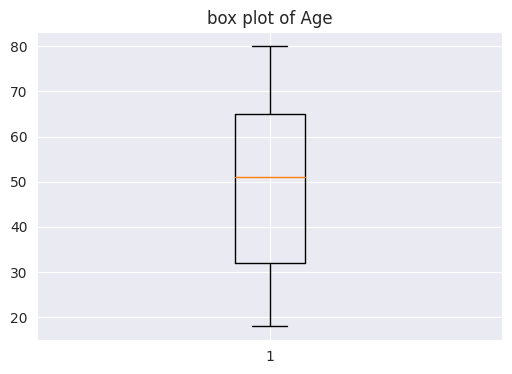

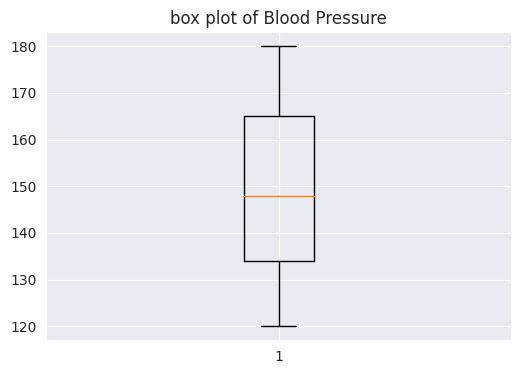

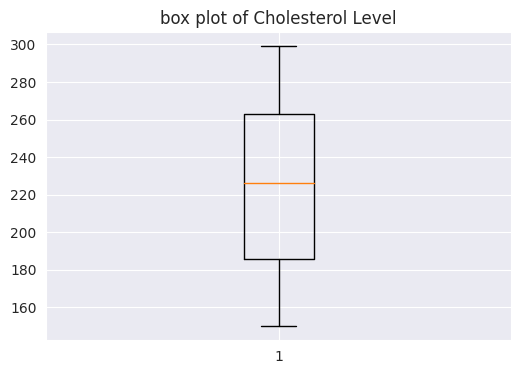

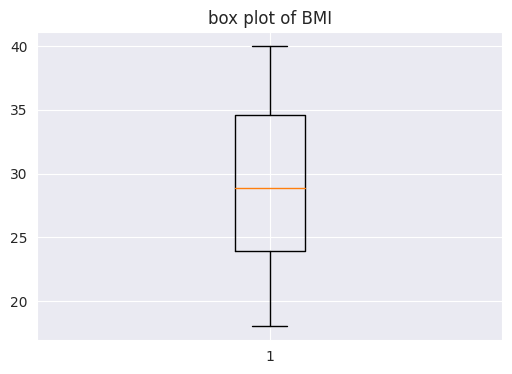

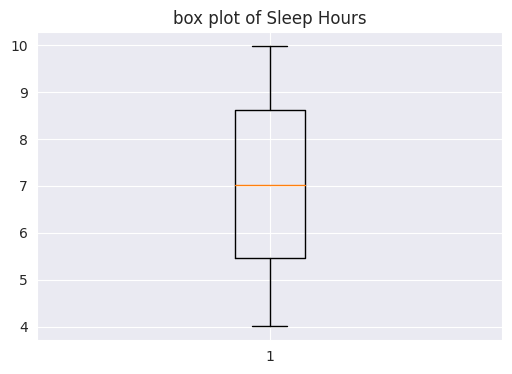

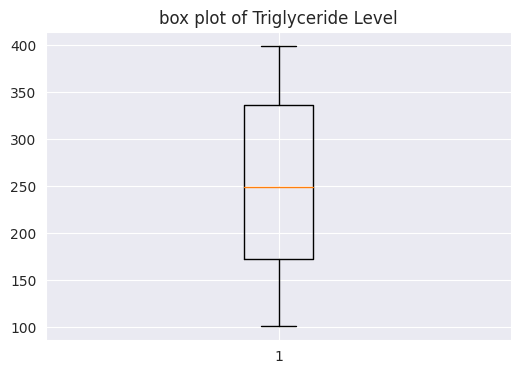

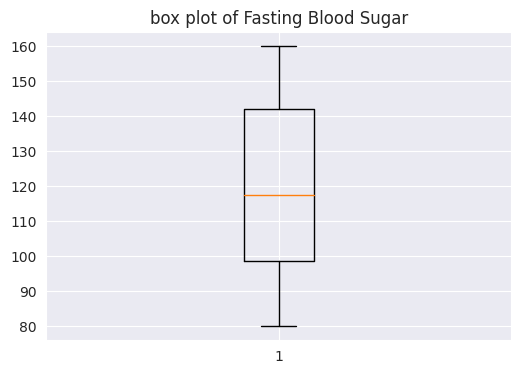

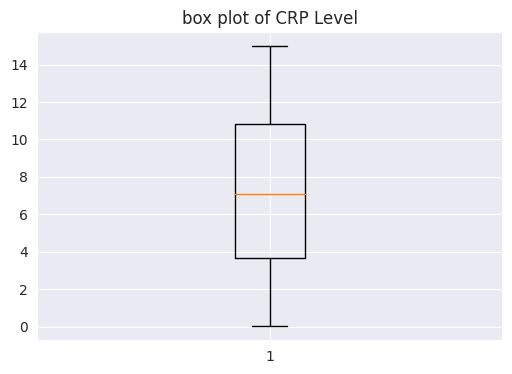

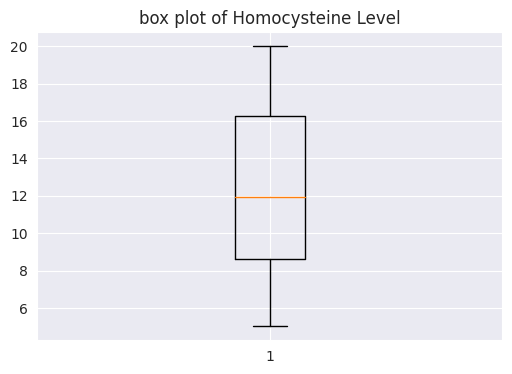

In [128]:
numerical_attributes = df.select_dtypes(include=['number']).columns

for col in numerical_attributes:
    plt.figure(figsize=(6,4))
    plt.boxplot(x=df[col], vert=True)
    plt.title(f"box plot of {col}")
    plt.show()
    

Here we can see there are no outlier points in the numerical data.
We will now move onto outliers in categorical data.

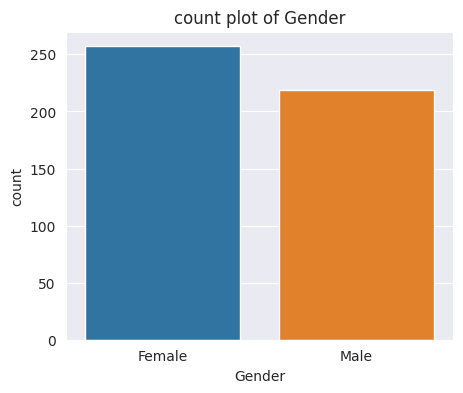

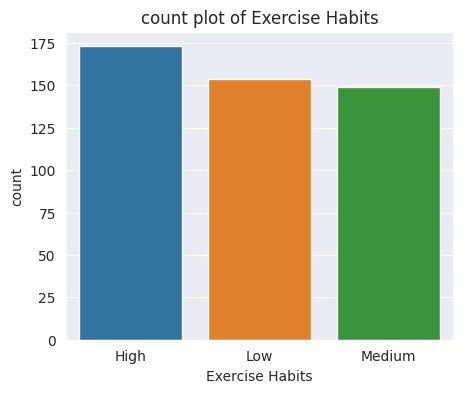

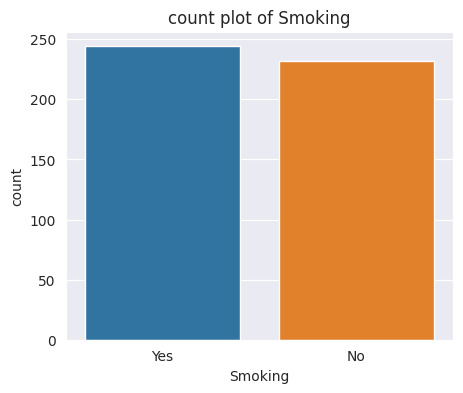

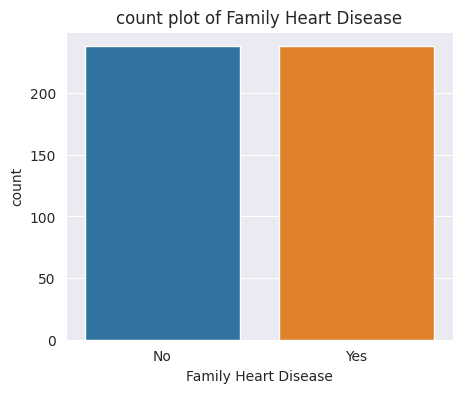

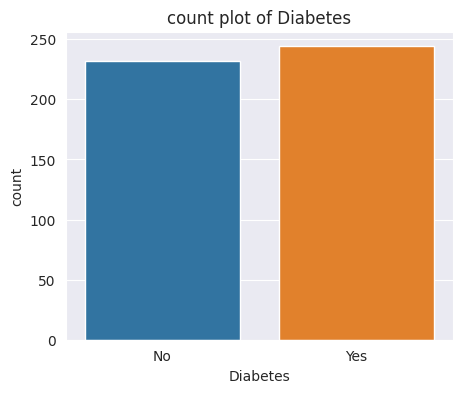

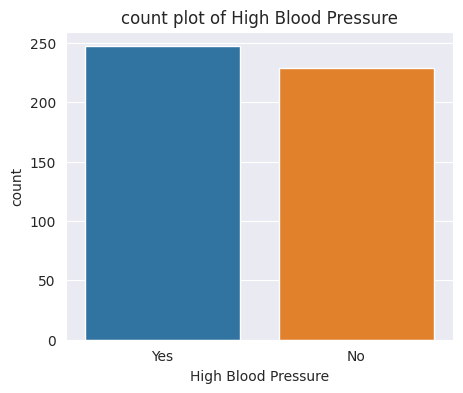

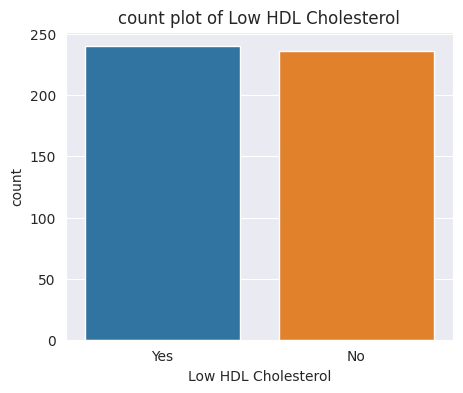

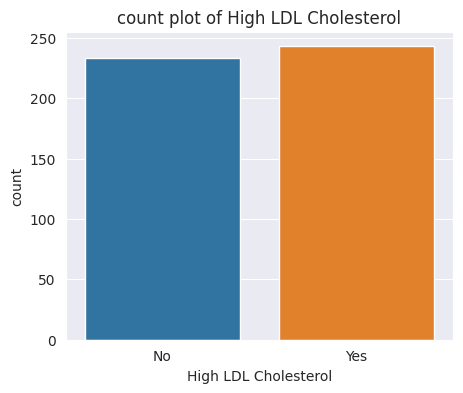

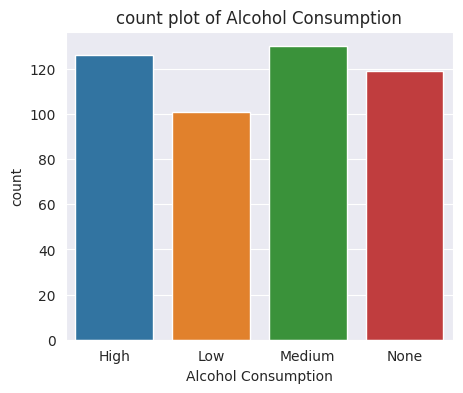

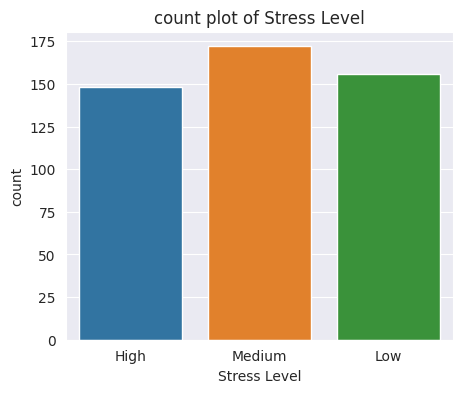

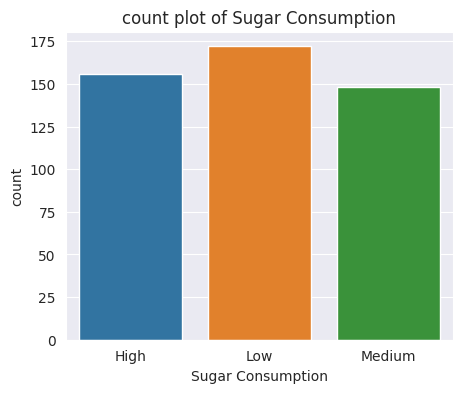

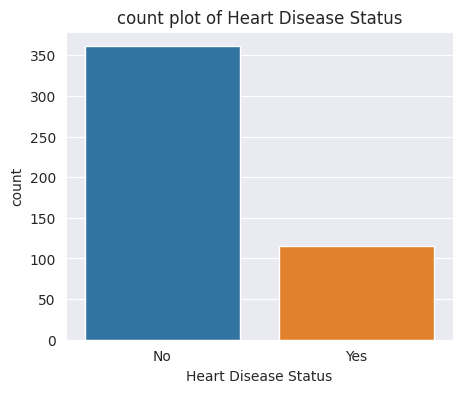

In [129]:

categorical_attributes = df.select_dtypes(include=['object']).columns

for col in categorical_attributes:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()



Here we can confirm that there are no outlier values within our categorical data, all entries are inline with expected values. Note there are significantly less diagnoses of heart disease, this is representative of the sample and will not skew our investigation into risk factors.

#### 1.3 Load: Storing Processed Data into CSV 

* This section involves storing our sampled and validated dataset into a new csv file ready for visualisation.

In [130]:
df.to_csv('resampled_heart_disease.csv', index=False)

# Section 2: Visualising data using matplotlib, seaborn & plotly

In [131]:
# loading resampled df ready to visualise
df = pd.read_csv('resampled_heart_disease.csv')

#verifying resampled rows is no longer 10,000 rows
df.shape

(476, 21)

### 2.1 Distribution of Key Variables

In [132]:
numerical_attributes = df.select_dtypes(include=['number']).columns
numerical_attributes

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

We will select a few key numerical variables to observe their normality and skew
* Cholesterol Levels
* BMI
* Age

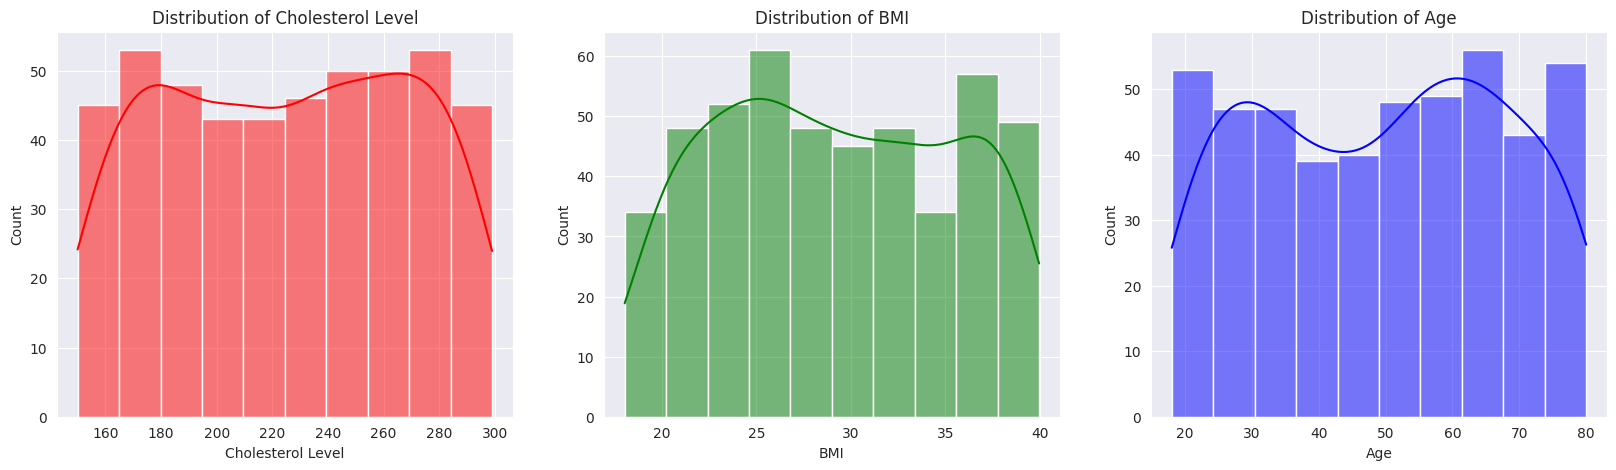

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

# cholesterol
sns.histplot(df['Cholesterol Level'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution of Cholesterol Level')
axes[0].set_label('Cholesterol Level')

# BMI
sns.histplot(df['BMI'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of BMI')
axes[1].set_label('BMI')

# Age
sns.histplot(df['Age'], kde=True, ax=axes[2], color='blue')
axes[2].set_title('Distribution of Age')
axes[2].set_label('Age')

The consistent density of Cholesterol and BMI suggests an even spread of these key variables throughout the sample population,  Age has two identifiable peaks in density around 30y.o and 65y.o. 

### 2.2 Numerical Values vs Heart Disease

Selection of Violin Plots of various Numerical Attributes vs Heart Disease Status

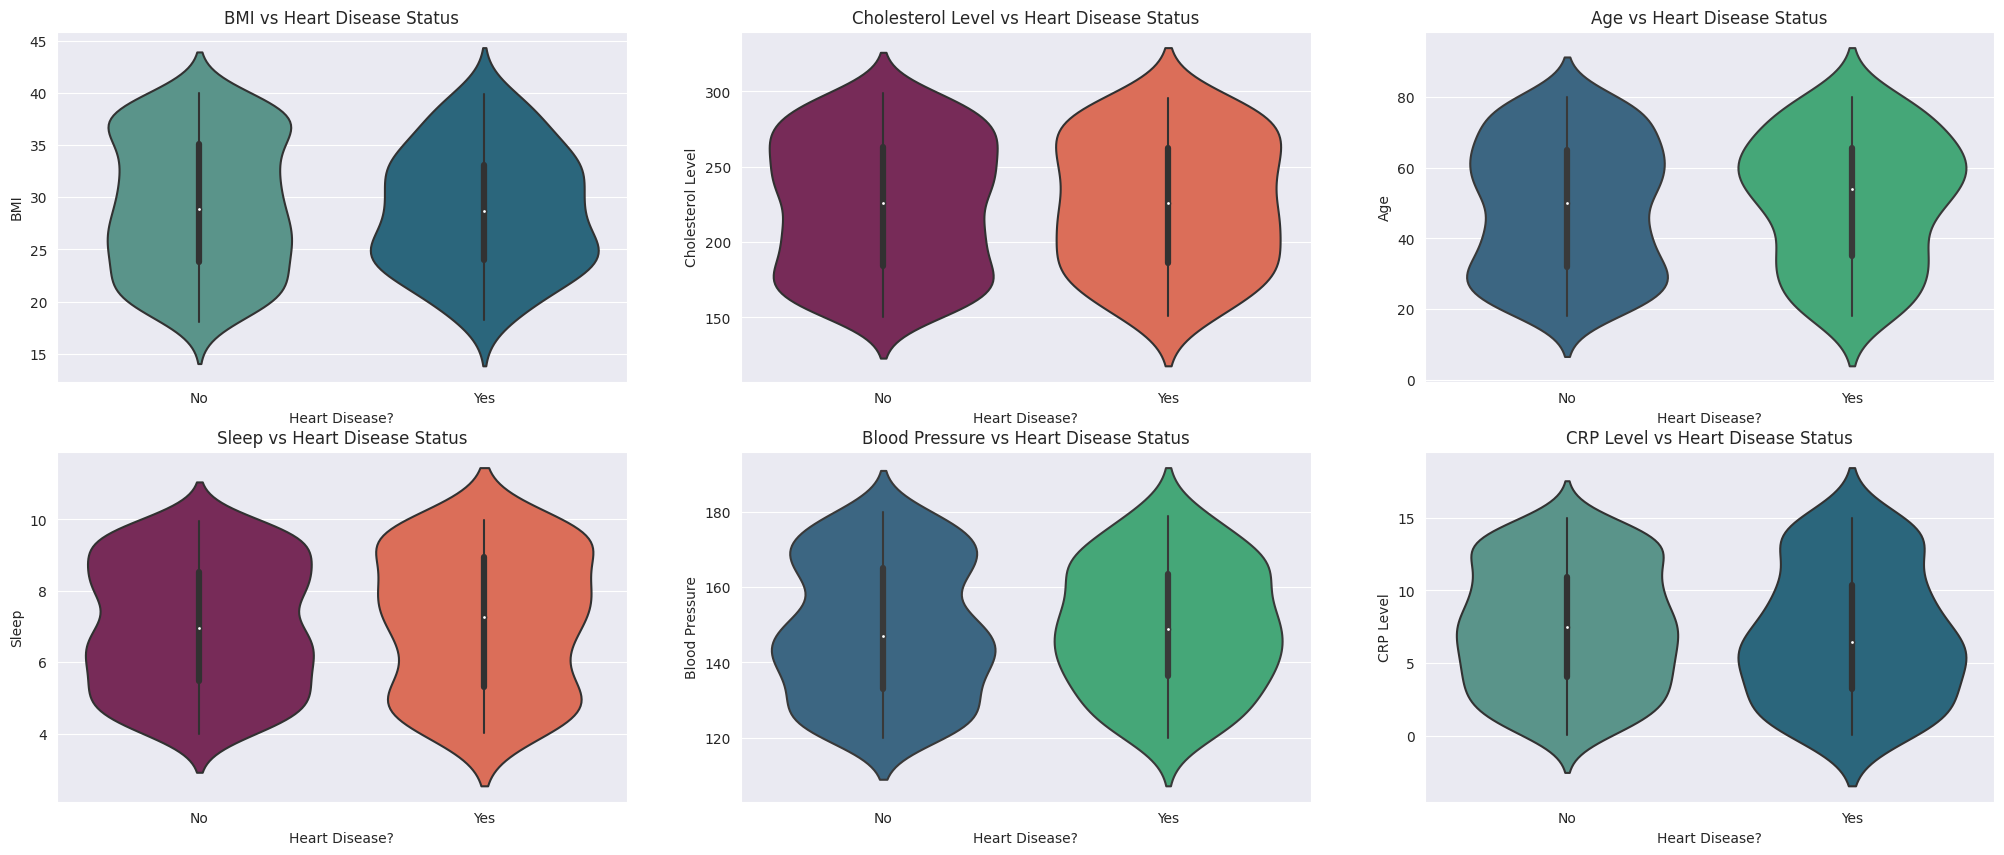

In [134]:
fig, axes = plt.subplots(2, 3, figsize=(25,10))

# BMI vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='BMI', palette='crest', ax=axes[0,0])
axes[0,0].set_title('BMI vs Heart Disease Status')
axes[0,0].set_xlabel('Heart Disease?')
axes[0,0].set_ylabel('BMI')


# Cholesterol Level vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='Cholesterol Level', palette='rocket', ax=axes[0,1])
axes[0,1].set_title('Cholesterol Level vs Heart Disease Status')
axes[0,1].set_xlabel('Heart Disease?')
axes[0,1].set_ylabel('Cholesterol Level')


# Age vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='Age', palette='viridis', ax=axes[0,2])
axes[0,2].set_title('Age vs Heart Disease Status')
axes[0,2].set_xlabel('Heart Disease?')
axes[0,2].set_ylabel('Age')

# Sleep vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='Sleep Hours', palette='rocket', ax=axes[1,0])
axes[1,0].set_title('Sleep vs Heart Disease Status')
axes[1,0].set_xlabel('Heart Disease?')
axes[1,0].set_ylabel('Sleep')

# Blood Pressure vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='Blood Pressure', palette='viridis', ax=axes[1,1])
axes[1,1].set_title('Blood Pressure vs Heart Disease Status')
axes[1,1].set_xlabel('Heart Disease?')
axes[1,1].set_ylabel('Blood Pressure')

# CRP Level vs Heart Disease Status
sns.violinplot(data=df, x='Heart Disease Status', y='CRP Level', palette='crest', ax=axes[1,2])
axes[1,2].set_title('CRP Level vs Heart Disease Status')
axes[1,2].set_xlabel('Heart Disease?')
axes[1,2].set_ylabel('CRP Level')


plt.show()




#### Main Findings
##### **BMI**
The BMI distributions for a positive diagnosis of heart disease show a higher density towards the higher end of the scale, suggesting individuals with a higher BMI are more at risk for developing heart disease
#### **Age**
The age distrubution similarly is more densely concentrated towards the middle aged and older populations, the peaks in density across the age groups with less so from 20-40 shows that age is a clear contributor to becoming at risk for heart disease.
#### **Blood Pressure**
Interestingly, the blood pressure distribution shows a fairly disributed density across all blood pressures. Whilst high blood pressure is typically associated with cardiovascular disease, 'low blood pressure can cause your heart to try to compensate by pumping faster or harder' (Cleveland Clinic) leading to permanent heart damage which increases risk of heart disease.

### 2.3 Categorical values vs. Heart Disease Diagnosis

We will select a few key categorical variables to observe their relation to heart disease.
* Diabetes
* Stress
* High Blood Pressure

In [135]:
categorical_attributes = df.select_dtypes(include=['object']).columns
categorical_attributes

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')

Text(0, 0.5, 'Count')

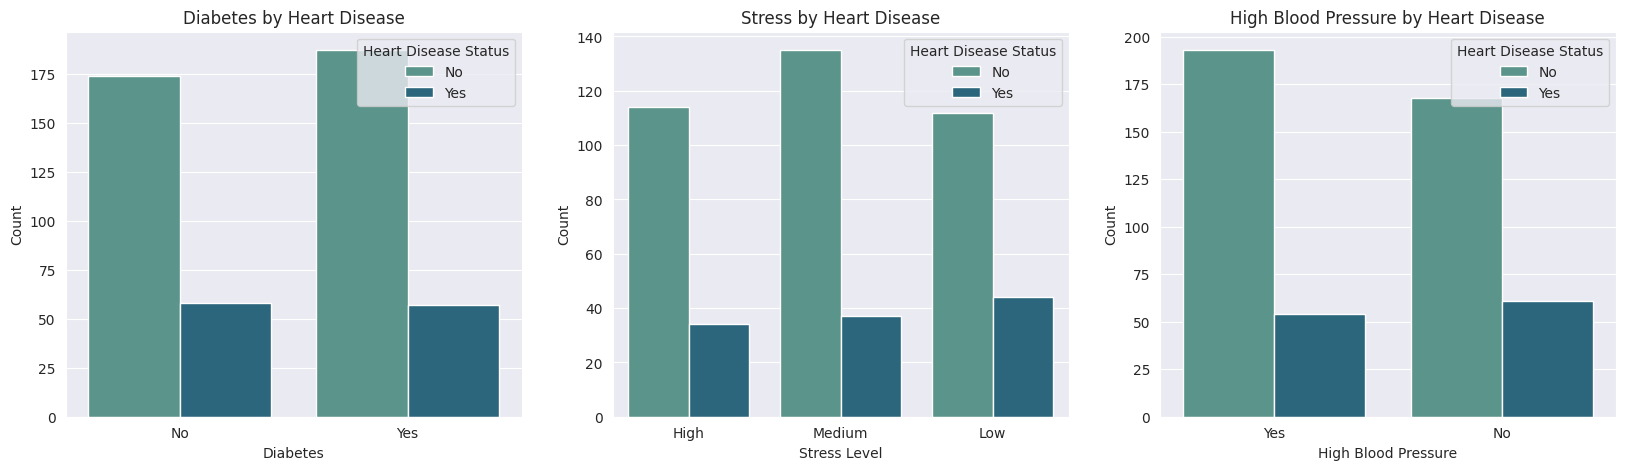

In [136]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.set_style('darkgrid')

# Diabetes vs Heart Disease
sns.countplot(x=df['Diabetes'], hue=df['Heart Disease Status'], ax=axes[0], palette='crest')
axes[0].set_title('Diabetes by Heart Disease')
axes[0].set_xlabel('Diabetes')
axes[0].set_ylabel('Count')

# Stress vs Heart Disease
sns.countplot(x=df['Stress Level'], hue=df['Heart Disease Status'], ax=axes[1], palette='crest')
axes[1].set_title('Stress by Heart Disease')
axes[1].set_xlabel('Stress Level')
axes[1].set_ylabel('Count')

# High Blood Pressure vs Heart Disease
sns.countplot(x=df['High Blood Pressure'], hue=df['Heart Disease Status'], ax=axes[2], palette='crest')
axes[2].set_title('High Blood Pressure by Heart Disease')
axes[2].set_xlabel('High Blood Pressure')
axes[2].set_ylabel('Count')

### 2.4 Pairplots

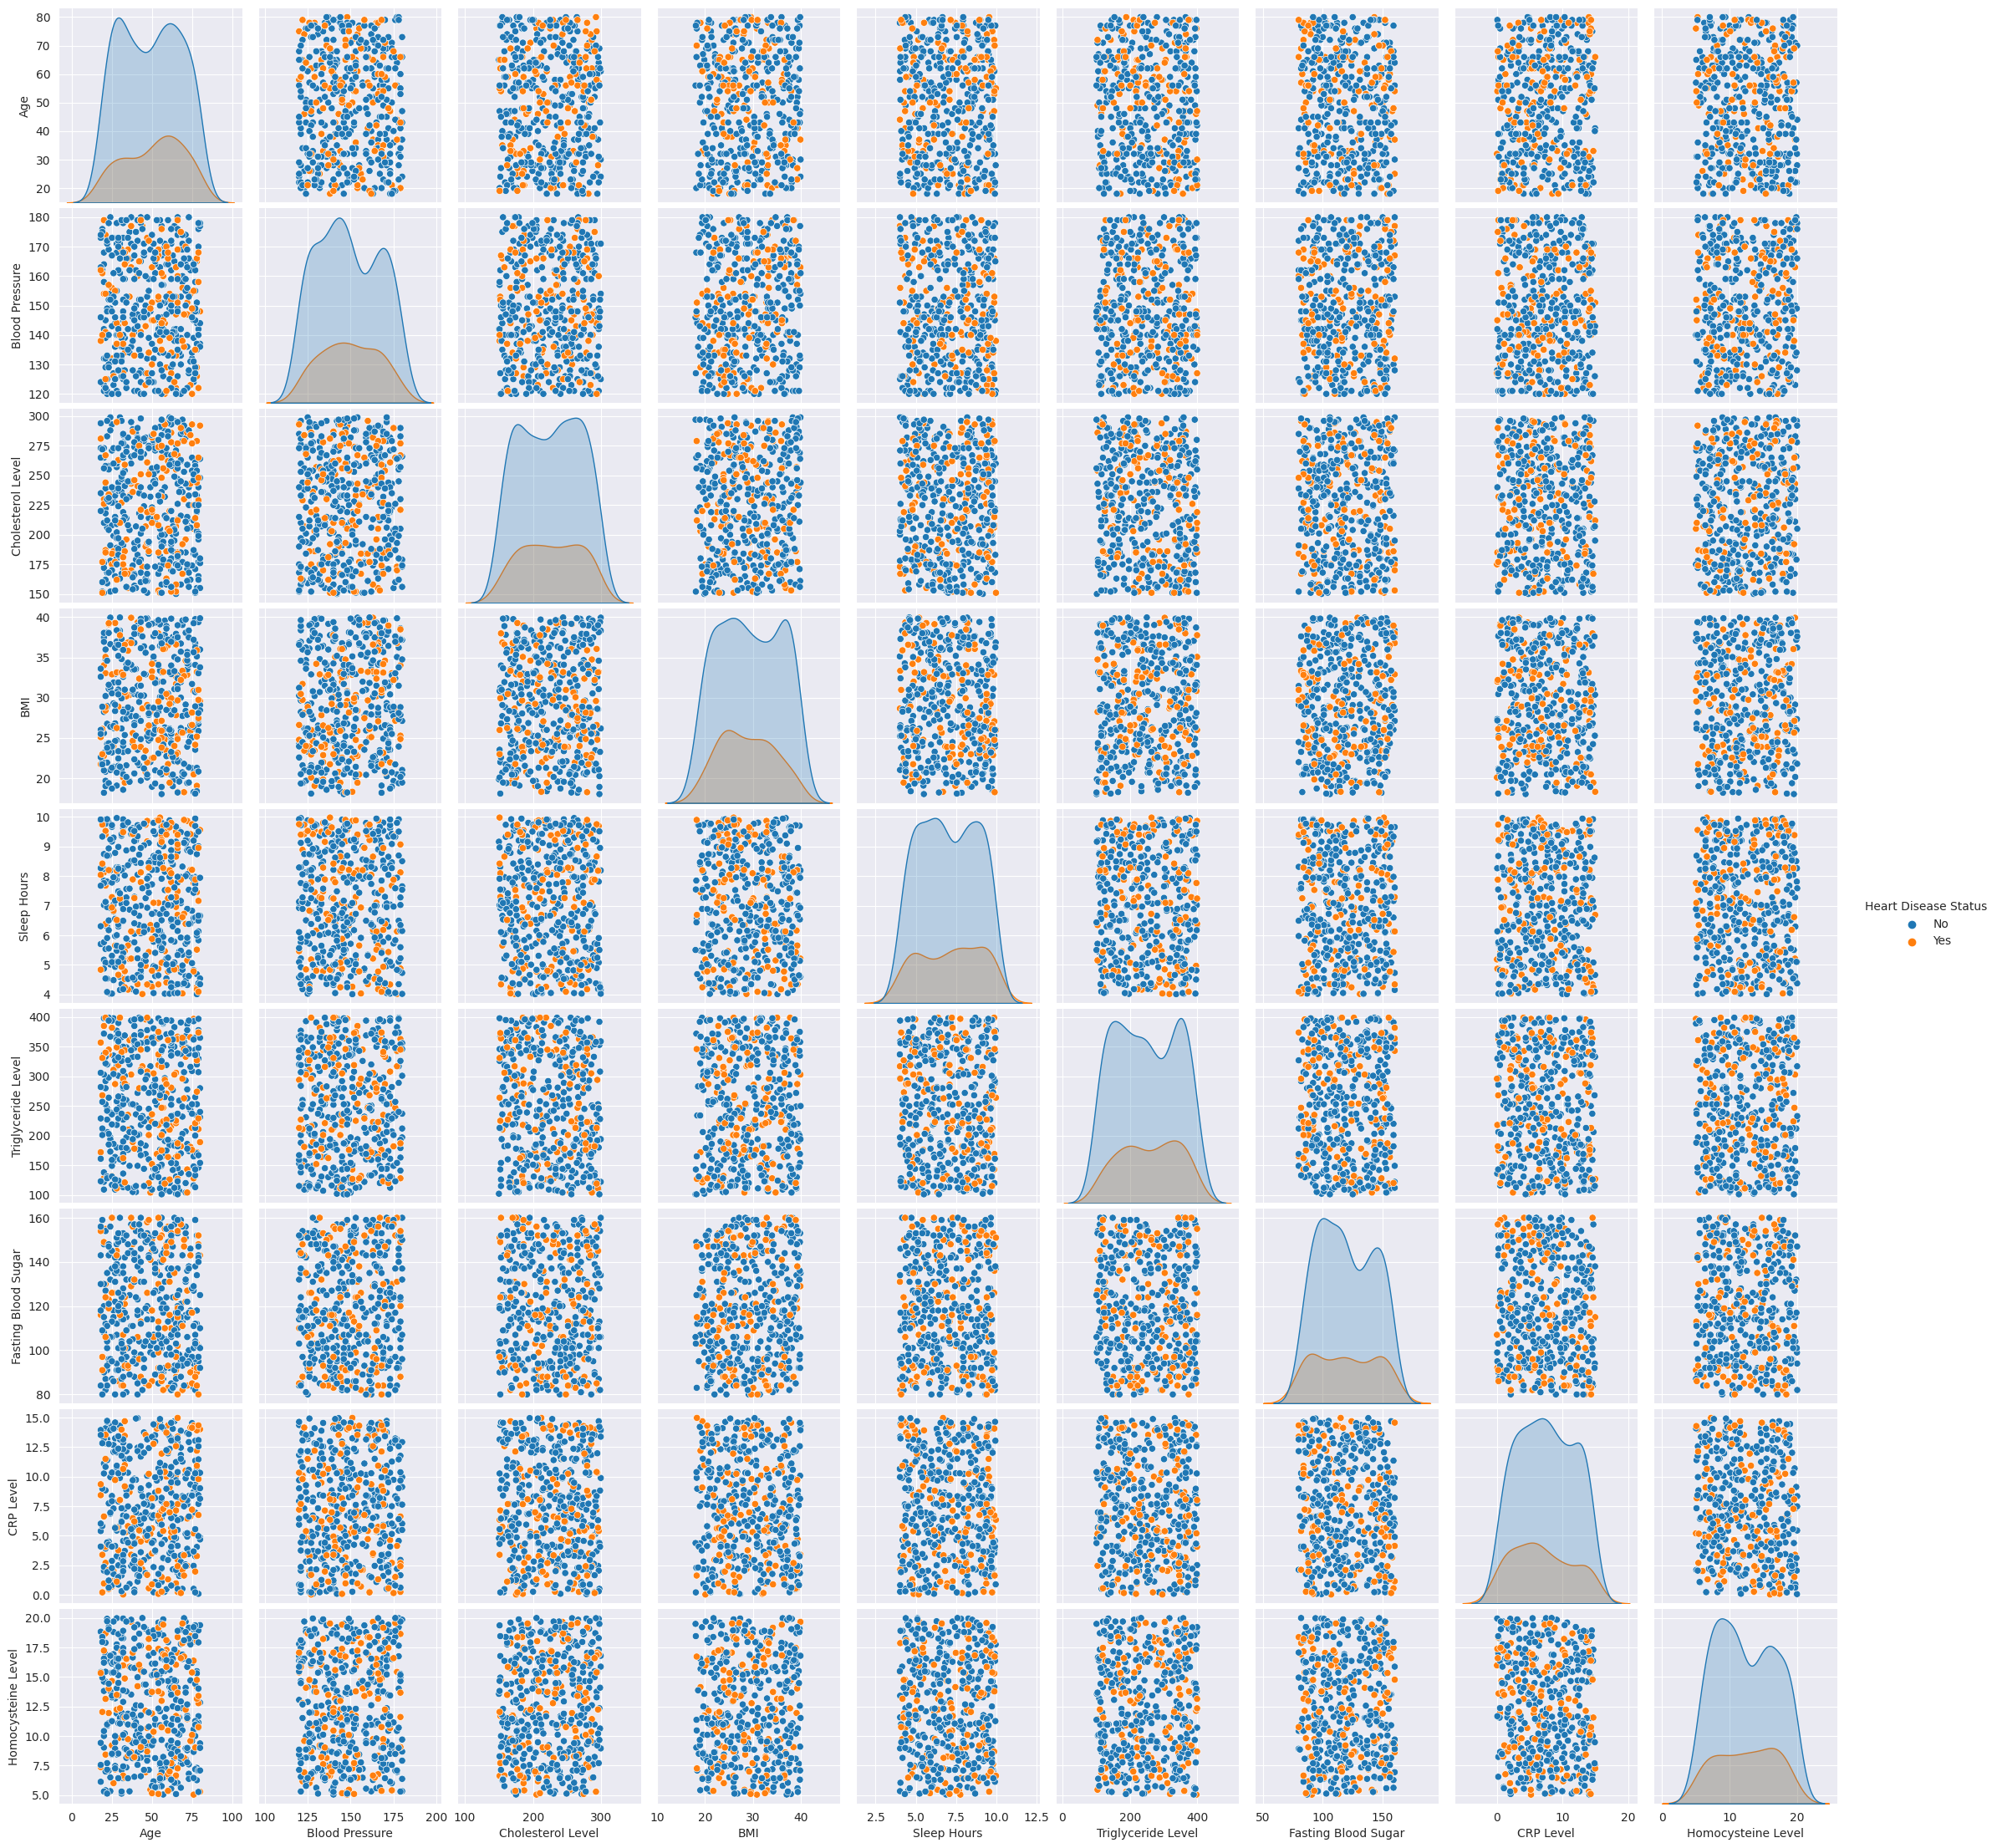

In [146]:

sns.pairplot(df, hue='Heart Disease Status')
plt.show()


As evident from the risk factor analysis, these variables do not hold a linear relationship with one another thus this method of visualisation will not help us to understand any underlying insights. 

### 2.5 Correlations

Instead, we will focus on the linear correlations between certain attributes and a posiitve heart disease diagnosis using the pearsons method.

In [106]:
print(df['Heart Disease Status'].unique())
print(df['Heart Disease Status'].value_counts())

['No' 'Yes']
No     361
Yes    115
Name: Heart Disease Status, dtype: int64


In [ ]:
# Step 1: convert heart disease diagnosis from a categorical attribute into a numerical one.

df.head() # heart disease status = 'Yes', 'No'
df['Heart Disease Status'] = df['Heart Disease Status'].str.strip()
df['Heart Disease Status']=df['Heart Disease Status'].map({"Yes":1,"No":0})
df.head() # heart disease status is now 1, 0



Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  66.0  Female           126.0              247.0            High     Yes   
1  80.0  Female           148.0              292.0             Low     Yes   
2  26.0    Male           127.0              228.0             Low      No   
3  32.0  Female           145.0              191.0          Medium     Yes   
4  28.0  Female           178.0              257.0            High      No   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                   No       No  37.095005                 Yes  ...   
1                   No       No  29.589385                  No  ...   
2                  Yes       No  29.300547                 Yes  ...   
3                   No       No  32.590335                  No  ...   
4                  Yes      Yes  36.223049                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High         High    9.099281   
1                   No                 Low       Medium    9.559051   
2                  Yes                 Low          Low    6.796673   
3                   No                High          Low    5.235624   
4                  Yes              Medium       Medium    5.101277   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0               High              167.0                153.0   1.846853   
1               High              189.0                143.0  14.014180   
2               High              335.0                118.0  12.093630   
3               High              156.0                125.0  12.870448   
4               High              317.0                 94.0   5.444671   

   Homocysteine Level  Heart Disease Status  
0           17.011822                     0  
1            5.276750                     1  
2           16.934615                     0  
3            6.413675                     0  
4           19.983608                     0  

[5 rows x 21 columns]

In [108]:
# Troubleshooting steps... :(
print(df['Heart Disease Status'].unique())
print(df[df['Heart Disease Status']==1].head())

[0 1]
     Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1   80.0  Female           148.0              292.0             Low     Yes   
6   36.0  Female           153.0              233.0          Medium     Yes   
10  66.0  Female           134.0              213.0            High      No   
12  21.0    Male           174.0              187.0          Medium      No   
13  44.0    Male           177.0              173.0             Low      No   

   Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                    No       No  29.589385                  No  ...   
6                    No      Yes  30.340275                  No  ...   
10                   No       No  21.988127                 Yes  ...   
12                  Yes      Yes  33.044278                  No  ...   
13                   No      Yes  28.658328                  No  ...   

   High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1             

In [109]:
# Step 2: filtering the data to only display rows with heart disease 

df_filtered = df[df['Heart Disease Status']==1]
print(df_filtered)
print(df_filtered.isna().sum())

# Step 3: remove non numerical columns

df_numeric_only=df_filtered.select_dtypes(include=['number'])

      Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1    80.0  Female           148.0              292.0             Low     Yes   
6    36.0  Female           153.0              233.0          Medium     Yes   
10   66.0  Female           134.0              213.0            High      No   
12   21.0    Male           174.0              187.0          Medium      No   
13   44.0    Male           177.0              173.0             Low      No   
..    ...     ...             ...                ...             ...     ...   
461  48.0    Male           134.0              251.0             Low      No   
469  79.0    Male           168.0              248.0          Medium      No   
470  66.0  Female           179.0              277.0             Low      No   
471  28.0  Female           137.0              162.0            High     Yes   
473  19.0  Female           140.0              151.0             Low     Yes   

    Family Heart Disease Diabetes      

In [110]:

# apply correlation

df_correlation = df_numeric_only.corr(method='pearson')
print(df_correlation)


                           Age  Blood Pressure  Cholesterol Level       BMI  \
Age                   1.000000       -0.058321           0.223098 -0.141913   
Blood Pressure       -0.058321        1.000000          -0.047882  0.322735   
Cholesterol Level     0.223098       -0.047882           1.000000 -0.038470   
BMI                  -0.141913        0.322735          -0.038470  1.000000   
Sleep Hours           0.086765       -0.231823           0.090390 -0.172435   
Triglyceride Level   -0.193489       -0.003643          -0.159604 -0.000751   
Fasting Blood Sugar  -0.116831        0.040740           0.048869  0.037193   
CRP Level             0.221481       -0.023608           0.081601 -0.108109   
Homocysteine Level    0.008461        0.116951           0.139565  0.014506   
Heart Disease Status       NaN             NaN                NaN       NaN   

                      Sleep Hours  Triglyceride Level  Fasting Blood Sugar  \
Age                      0.086765           -0.19348

I encountered great difficulty with mapping since my dataframe post mapping contained 0 rows... An error seemingly defying logic.

As learnt during my python studies, print statements are a useful tool to deal with debugging - I printed out the unique values and value counts to get a better look at the values in the heart disease status column.

After much deliberation, I came across the pandas documentation wherein I found a function to strip whitespace from entries.

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html

Lo and behold, this solved my error and we can now continue with visualising the correlation in heatmap form.

### 2.6 HeatMap

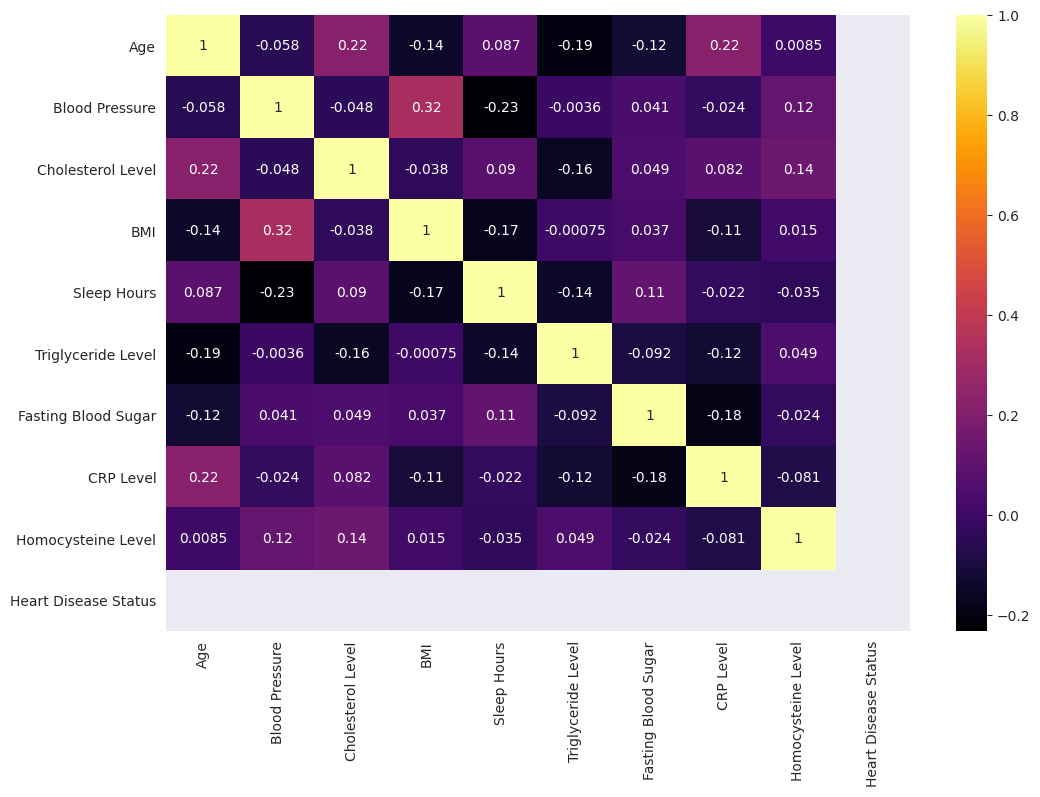

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_correlation, annot=True, cmap="inferno", cbar=True)
plt.show()

The correlation between blood pressure and BMI is 0.31, indicating a moderate level positive relationship suggesting that as BMI increases, blood pressure follows suit.

This coinides with medical knowledge as higher BMI leads to increased strain on the heart.

The correlation bwtween Cholesterol and Age is 0.22 which is a weak correlation, suggesting age alone is not a strong predictor of cholesterol levels. 



### 2.7 Hexbin

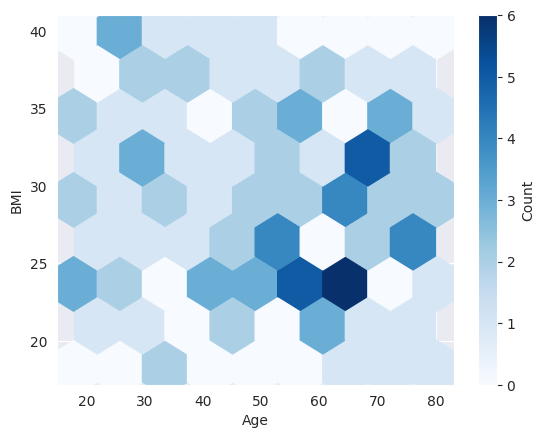

In [ ]:
plt.hexbin(df_filtered['Age'], df_filtered['BMI'], gridsize=8, cmap='Blues')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Count')
plt.show()

As we can see from this BMI vs Age hexbin plot, there is a darker concentration of individuals with heart disease aged between 50-70 within the 25-35 BMI range, indicating they are overweight. Satisfying our hypothesis 5.

### 2.8 Plotly + In depth hypothesis testing

#### Hypothesis 1: Individuals with diabetes are more likely to develop heart disease

#### H1 Visualisation

In [ ]:
fig = px.histogram(df, x=df['Diabetes'], color=df['Heart Disease Status'], title='Heart Disease vs Diabetes', labels={'Heart Disease': 'Heart Disease Status', 'Diabetes': 'Diabetes '}, barmode='group', histfunc='count')

fig.show()

#### H1 Statistical Testing
We will use chi-square to determine if there is a relationship between our two categorical variables: heart disease and diabetes.

We are able to do so as we satsify the following assumptions:
* sample size > 100 ? YES
* categorical variables ? YES

null hypothesis: there is NOT a relationship between diabetes and heart disease

alternate hypothesis: there IS a relationship between diabetes and heart disease

In [114]:
print(df['Diabetes'].value_counts())

Yes    244
No     232
Name: Diabetes, dtype: int64


In [138]:

cross_table = pd.crosstab(df['Diabetes'], df['Heart Disease Status'])
chi_analysis = st.chi2_contingency(cross_table)
print(chi_analysis)


Chi2ContingencyResult(statistic=0.09643224570903303, pvalue=0.756153830245926, dof=1, expected_freq=array([[175.94957983,  56.05042017],
       [185.05042017,  58.94957983]]))


The computed statistic was 0.0964
- The closer the stat is to 0 the more it suggests the variables are independent.

The P value is 0.7562
- It is greater than 0.05, therefore we fail to reject the null hypothesis meaning there is no significant association between diabetes and heart disease in our data sample.

#### Hypothesis 2: Higher cholesterol levels have a positive relationship with heart disease diagnosis

#### H2 Visualisation

In [141]:
fig = px.violin(df, x=df['Cholesterol Level'], y=df['Heart Disease Status'], color='Heart Disease Status', title='Cholesterol Levels vs Heart Disease Status')

fig.show()

#### Hypothesis 3: Smokers are more likely to develop heart disease compared to non-smokers

In [143]:
# subset dataset

fig = px.pie(df_filtered, names='Smoking', title='Distribution of smokers vs non-smokers with heart disease', labels={'Smoking': 'Smoking'}, hole=0.3)
fig.show()

From this donut chart we can see an equal distribution between the groups with a slight favour towards smokers. This suggests tht smoking alone is not one of the most determinign factors associated with heart disease.

#### Hypothesis 4: Individuals with a family history of heart disease are more likely to develop heart disease themselves

In [145]:
# subset dataset

fig = px.pie(df_filtered, names='Family Heart Disease', title='Distribution of heart disease in family ', labels={'Family Heart Disease': 'Family Heart Disease'}, hole=0.3)
fig.show()

Once again there is an even distribution within this data. Further statistical testing would need to be undertaken to determine if family history is a significant risk factor.

### 2.9 Dashboard

# 3 Conclusions & Findings

## Answering Questions

### Which risk factors are most strongly associated with heart disease? What demographic groups are most at risk?

### High BMI
The distribution of individuals with a higher BMI value with heart disease is an indication that those with higher weights are at risk of developing heart disease. A high BMI itself can contribute to the other named risk factors such as blood pressure and higher cholesterol and those in turn may contribute to heart disease.

### Older Age
Individuals aged over 40 demonstrated peaks in distribution for heart disease, suggesting a higher incidence of heart disease in older adults.

## Skewed dataset 

### Impact on hypothesis testing
The dataset used, although resampled, was skewed with a smaller proportion of those diagnosed with heart disease leading to an unbalanced representation of the true relationshuip between risk factors.


## Implications of Findings 
- These findings reinforce the importance of managing all risk factors mentioned in this report. Regular monitoring of BMI, cholesterol, blood pressure and blood sugar through healthier lifestyle habits such as exercise, quitting cigarettes etc. can help to mitigate the risk. 
- Professionals and health departments should stress the importance of BMI and exercise in particular to their patients given its relatively higher relevance out of the risk factors.

## Conclusion

In conclusion, BMI and age have emerged as important risk factors that contribute to heart disease. Through analysis we can see that heart disease is a multi-factor condition. There isn't a single risk factor that can fully predict the risk of heart disease and rather a combination of factors such as lifestyle, pre-existing conditions like diabetes and family history can predict the incidence rate.
